# ARIMA & SARIMA modelling using data from FRED API

#### Autoregressive integrated moving averages

In [116]:
#installing required libraries

import fredapi as fa
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
# Extracting month wise data from 1994 to 2018 for Production: Energy: Electricity: Total for India (Seasonally adjusted)

fred = fa.Fred(api_key='api_key')
ind_elec = fred.get_series('INDPRENEL01IXOBSAM')
df = pd.DataFrame(ind_elec)
df.head()

,0
1994-04-01,28.956087
1994-05-01,29.151891
1994-06-01,29.233632
1994-07-01,29.209316
1994-08-01,30.104826


In [51]:
df.rename(columns = {0: 'Production'}, inplace = True)
print(type(df.index))
df.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Production
1994-04-01,28.956087
1994-05-01,29.151891
1994-06-01,29.233632
1994-07-01,29.209316
1994-08-01,30.104826


In [63]:
df.head()

,Production,dayofweek,quarter,month,year,dayofyear
1994-04-01,28.956087,4,2,4,1994,91
1994-05-01,29.151891,6,2,5,1994,121
1994-06-01,29.233632,2,2,6,1994,152
1994-07-01,29.209316,4,3,7,1994,182
1994-08-01,30.104826,0,3,8,1994,213


<AxesSubplot:title={'center':'Production: Energy: Electricity:India'}>

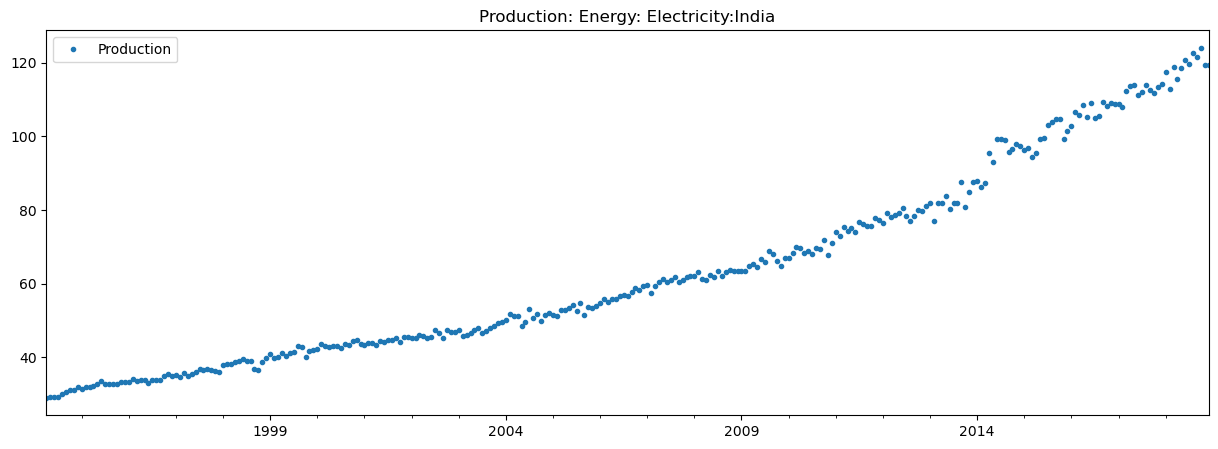

In [58]:
df.plot(style = '.', figsize = (15,5), title = 'Production: Energy: Electricity:India')

In [62]:
# adding columns from date index

df['dayofweek'] = df.index.day_of_week
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.day_of_year


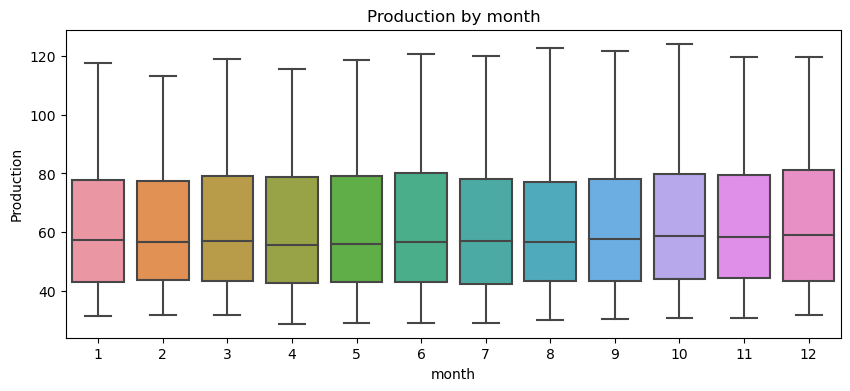

In [73]:
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(data= df, x = 'month', y = 'Production')
ax.set_title('Production by month')
plt.show()

In [122]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller
statsmodels.graphics.tsa

In [123]:
import statsmodels

In [83]:
adtest = adfuller(df['Production'])

In [86]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [87]:
adfuller_test(df['Production'])

ADF Test Statistic : 4.11526667954217
p-value : 1.0
#Lags Used : 12
Number of Observations Used : 284
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [88]:
df['Prod_first_diff'] = df['Production'] - df['Production'].shift(1)

In [90]:
adfuller_test(df['Prod_first_diff'].dropna())

ADF Test Statistic : -3.6612484144422766
p-value : 0.004692451071445346
#Lags Used : 14
Number of Observations Used : 281
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:title={'center':'Production First difference'}>

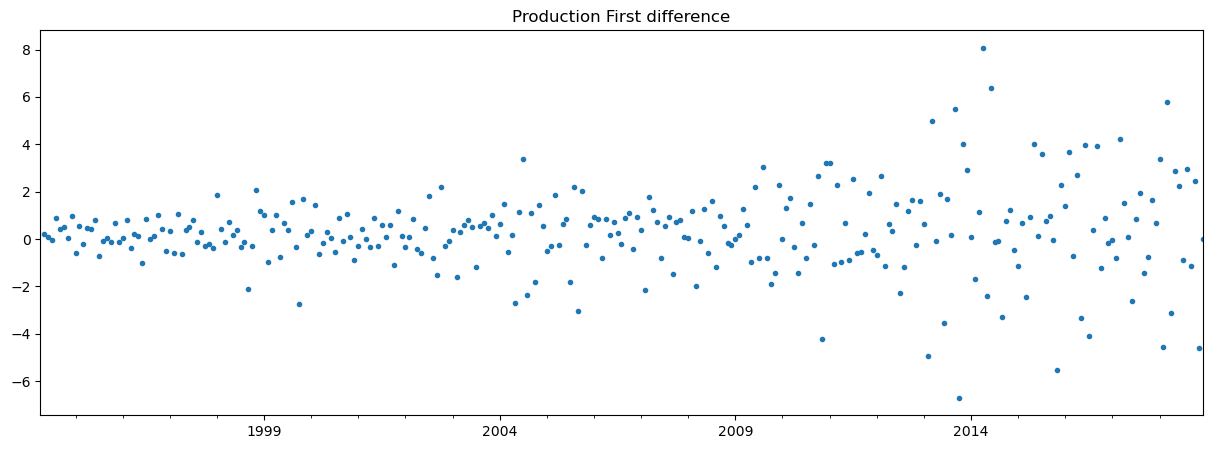

In [112]:
df['Prod_first_diff'].plot( style = '.', figsize = (15,5), title = 'Production First difference')

# Auto Regressive model

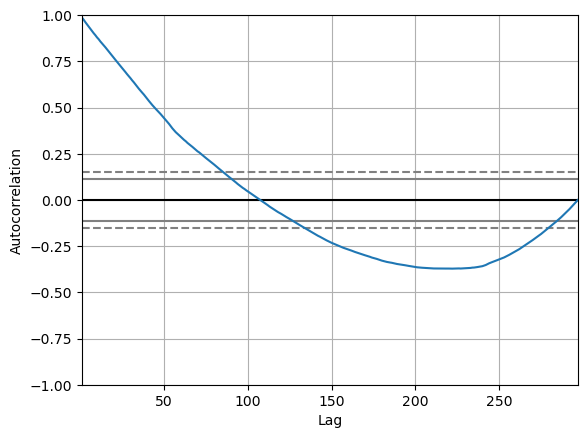

In [118]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Production'])
plt.show()

In [119]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


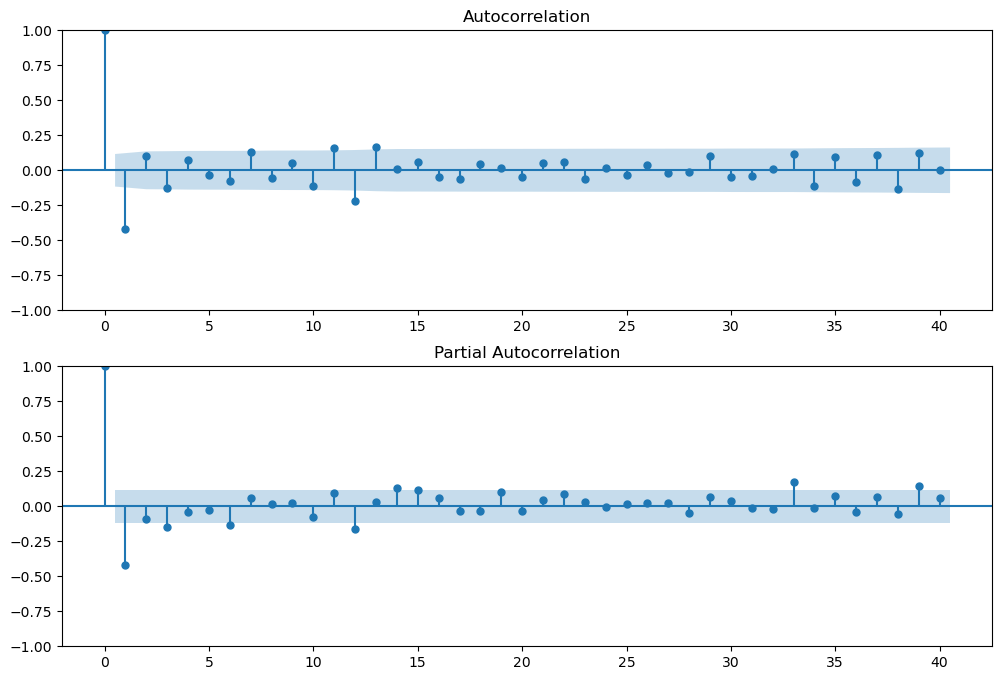

In [125]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Prod_first_diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Prod_first_diff'].iloc[13:],lags=40,ax=ax2)

In [127]:
df[df.index<'2015-01-01']['Production']

1994-04-01    28.956087
1994-05-01    29.151891
1994-06-01    29.233632
1994-07-01    29.209316
1994-08-01    30.104826
                ...    
2014-08-01    99.130019
2014-09-01    95.850699
2014-10-01    96.605703
2014-11-01    97.838554
2014-12-01    97.366429
Name: Production, Length: 249, dtype: float64

In [130]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df[df.index<'2015-01-01']['Production'],order=(2,2,1))
model_fit=model.fit()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [131]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                  249
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -432.769
Date:                Wed, 25 Jan 2023   AIC                            873.538
Time:                        01:36:57   BIC                            887.576
Sample:                    04-01-1994   HQIC                           879.190
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4788      0.054     -8.869      0.000      -0.585      -0.373
ar.L2         -0.1569      0.041     -3.855      0.000      -0.237      -0.077
ma.L1         -0.9810      0.013    -75.019      0.000      -1.007      -0.955
sigma2         1.9120      0.087     21.886      0.000       1.741       2.083
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               424.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               6.91   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
df.tail()

,Production,dayofweek,quarter,month,year,dayofyear,Prod_first_diff
2018-08-01,122.782986,2,3,8,2018,213,2.975879
2018-09-01,121.641193,5,3,9,2018,244,-1.141793
2018-10-01,124.092531,0,4,10,2018,274,2.451338
2018-11-01,119.479287,3,4,11,2018,305,-4.613244
2018-12-01,119.479235,5,4,12,2018,335,-0.000052


In [133]:
df['forecast']=model_fit.predict(start='2015-01-01',end='2018-12-01',dynamic=True)

<AxesSubplot:>

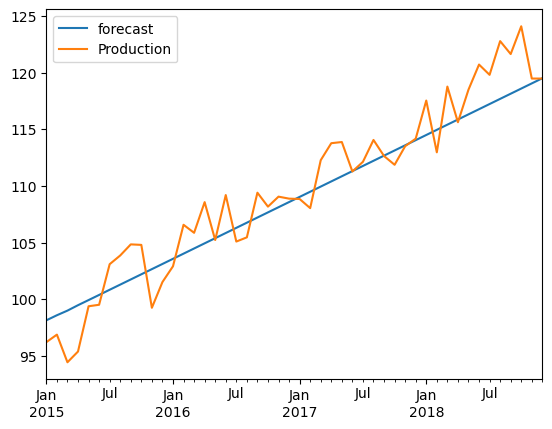

In [137]:
df[df.index>='2015-01-01'][['forecast', 'Production']].plot()

<AxesSubplot:>

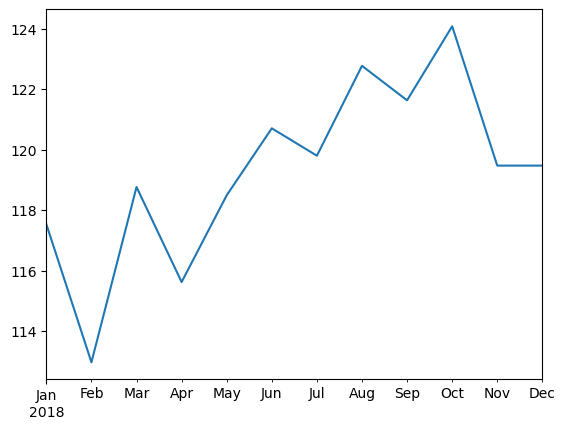

In [141]:
df[df.index>='2018-01-01']['Production'].plot()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:>

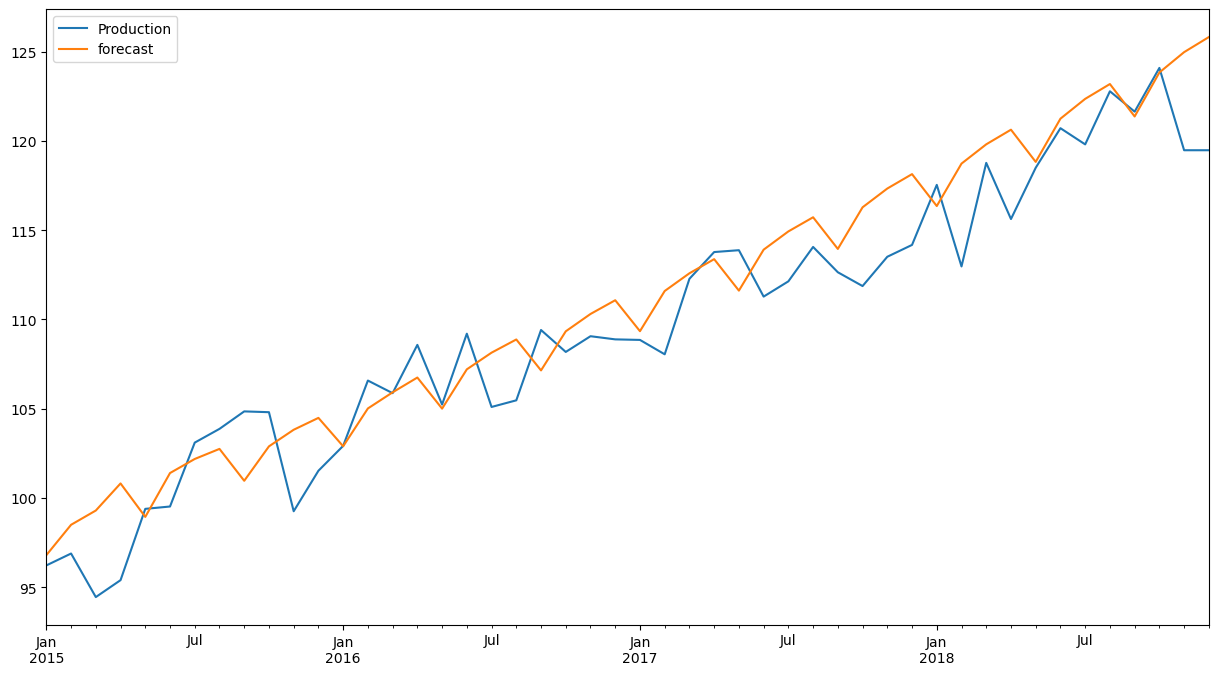

In [158]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df[df.index<'2015-01-01']['Production'],order=(2, 2, 1),seasonal_order=(2, 2, 1,4))
results=model.fit()
df['forecast']=results.predict(start='2015-01-01',end='2018-12-01',dynamic=True)
df[df.index>='2015-01-01'][['Production','forecast']].plot(figsize=(15,8))

In [161]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Production   No. Observations:                  249
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 4)   Log Likelihood                -475.834
Date:                           Wed, 25 Jan 2023   AIC                            965.668
Time:                                   01:52:45   BIC                            990.003
Sample:                               04-01-1994   HQIC                           975.474
                                    - 12-01-2014                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4870      0.051     -9.490      0.000      -0.588      -0.386
ar.L2         -0.1267      0.044     -2.902      0.004      -0.212      -0.041
ma.L1         -0.9997      1.739     -0.575      0.565      -4.408       2.408
ar.S.L4       -0.5264      0.057     -9.224      0.000      -0.638      -0.415
ar.S.L8       -0.2095      0.066     -3.175      0.002      -0.339      -0.080
ma.S.L4       -0.9999     11.377     -0.088      0.930     -23.299      21.299
sigma2         2.7062     31.093      0.087      0.931     -58.235      63.648
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               196.29
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               6.28   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""